In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

levenberg optimization

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_sep_vmax import *


In [4]:
os.listdir()

['model_NC_honly.ipynb',
 'model_NC_ponly.ipynb',
 '__pycache__',
 'cluster_assignment.csv.gz',
 'model_quota_cc.ipynb',
 'model_equations_no_quota.py',
 '.ipynb_checkpoints',
 'model_NC_salib.ipynb',
 'model_quota_ponly.ipynb',
 '.git',
 'model_noquota_ponly.ipynb',
 'model_NC_cc_optimize.ipynb',
 'model_equations_separate_NC.py',
 'model_NC_cc_mechanisms.ipynb',
 'prepare_data',
 'Model_Parameters.xlsx',
 'model_equations_separate_NC_sep_vmax.py',
 '.gitignore',
 'run_sensitivity.py',
 'model_param_sensitivity.ipynb',
 'doc',
 'model_NC_lookup.ipynb',
 'model_quota_honly.ipynb',
 'model_NC_analyze_clusters.ipynb',
 '.gitattributes',
 'prelim_bottle.csv',
 'calc_csat.py',
 'param_values_log.txt.gz',
 'master model notebook.ipynb',
 'model_NC_cc.ipynb',
 'model_equations.py',
 'results_postprocess.py',
 'model_noquota_cc.ipynb',
 'model_noquota_honly.ipynb',
 'param_values.txt.gz',
 'README.md',
 'model_NC_lookup before signal resp.ipynb']

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [7]:
refdf = pd.read_csv('prelim_bottle.csv')


In [8]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [9]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
EOp  = 1.16e-06, 1.00e-01
EIp  = 0.00e+00, 0.00e+00
EOh  = 1.16e-06, 1.00e-01
EIh  = 0.00e+00, 0.00e+00
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 1.62e-06, 1.40e-01
VmaxINp  = 8.10e-06, 7.00e-01
VmaxOCp  = 1.13e-05, 9.80e-01
VmaxICp  = 5.67e-05, 4.90e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
Oh  = 1.00e+00, 8.64e+04
Op  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VROSmax  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
omegaP  = 1.00e-02, 8.64e+02
omegaH  = 1.00e-05, 8.64e-01
ROS_decay  = 1.16e-07, 1.00e-02
KABp  = 1.43e-01, 1.23e

In [10]:
len(param_vals)

In [11]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [12]:
Qh * 14 * 1e9, Qp * 14 * 1e9, 

dBp/dt


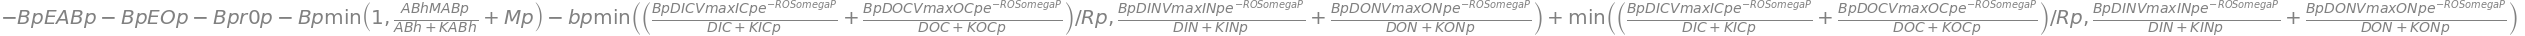

dBh/dt


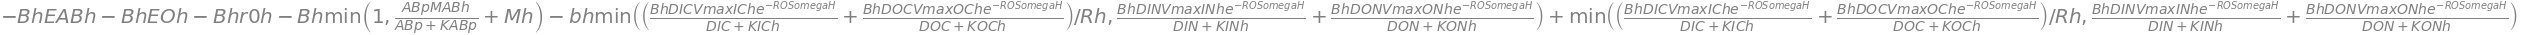

dDON/dt


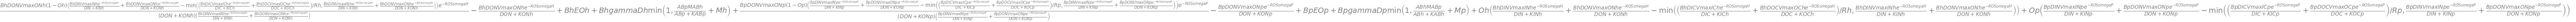

dRDON/dt


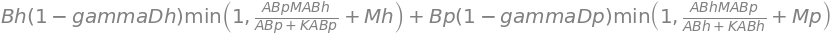

dDIN/dt


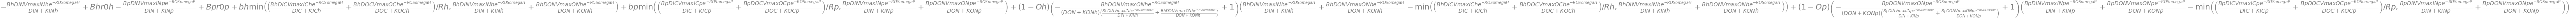

dDOC/dt


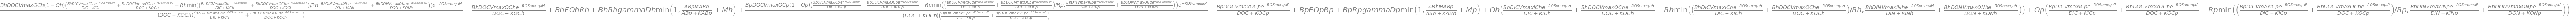

dRDOC/dt


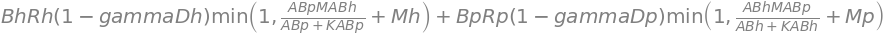

dDIC/dt


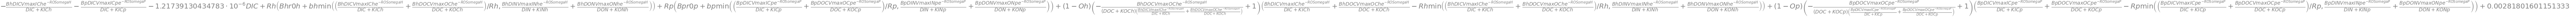

dROS/dt


dABp/dt


dABh/dt


In [13]:
print_equations()


In [14]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data()

In [15]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 9.26e-06, init Bp = 1.79e+00, newval = 1.79e+00
dBh/dt = 1.50e-04, init Bh = 1.43e+01, newval = 1.43e+01
dDON/dt = 2.68e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 7.44e-06, init RDON = 0.00e+00, newval = 7.44e-06
dDIN/dt = -1.93e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -8.43e-04, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 3.55e-05, init RDOC = 0.00e+00, newval = 3.55e-05
dDIC/dt = 6.98e-05, init DIC = 2.31e+03, newval = 2.31e+03
dROS/dt = -4.19e-05, init ROS = 2.00e-01, newval = 2.00e-01
dABp/dt = 1.16e-16, init ABp = 0.00e+00, newval = 1.16e-16
dABh/dt = 5.79e-16, init ABh = 0.00e+00, newval = 5.79e-16


In [16]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
Xh   = 5.00e+09
limINp = 9.99e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINp = 1.44e-05
gross_uptakeONp = 2.87e-06
gross_uptakeICp = 1.01e-04
gross_uptakeOCp = 2.02e-05
gross_uptakeINh = 2.14e-04
gross_uptakeONh = 2.12e-04
gross_uptakeICh = 0.00e+00
gross_uptakeOCh = 9.65e-04
net_uptakeNp = 1.73e-05
net_uptakeNh = 2.15e-04
overflowNp = 0.00e+00
overflowCp = 2.59e-07
overflowNh = 2.12e-04
overflowCh = -6.51e-19
deathp = 2.07e-06
deathh = 1.65e-05
leakinessOp = 2.07e-06
leakinessIp = 0.00e+00
leakinessOh = 1.65e-05
leakinessIh = 0.00e+00
ROSreleasep = 1.16e-06
ROSbreakdownh = 4.88e-05
respirationp = 3.89e-06
respirationh = 3.19e-05
dic_air_water_exchange = -7.37e-18
limICp = 1.00e+00
exp(-omegaP*ROS) = 9.98e-01


In [17]:
biomass_diff0(calc_dydt, var_names,init_vars)


dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -6.944585965312777e-16


In [18]:
1e10 * Qh

In [19]:
1e9 * Qp

In [20]:
pro_alt_vol_ratio, pro_vol, alt_vol

In [21]:
init_vars

In [22]:
get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t'])


array([       0.,    14400.,    28800.,    43200.,    57600.,    72000.,
          86400.,   100800.,   115200.,   129600.,   144000.,   157320.,
         158400.,   172800.,   187200.,   201600.,   216000.,   230400.,
         244800.,   259200.,   273600.,   288000.,   302400.,   316800.,
         331200.,   345600.,   360000.,   374400.,   388800.,   403200.,
         417540.,   417600.,   432000.,   446400.,   460800.,   475200.,
         489600.,   504000.,   518400.,   532800.,   547200.,   561600.,
         576000.,   590400.,   592140.,   604800.,   619200.,   633600.,
         648000.,   662400.,   676800.,   691200.,   705600.,   720000.,
         734400.,   748800.,   758520.,   763200.,   777600.,   792000.,
         806400.,   820800.,   835200.,   849600.,   864000.,   878400.,
         892800.,   907200.,   921600.,   936000.,   950400.,   964800.,
         979200.,   993600.,  1008000.,  1019820.,  1022400.,  1036800.,
        1051200.,  1065600.,  1080000.,  1094400., 

In [23]:
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 83.796803418


In [24]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [25]:
def _rmse(refdf, df, refcol, col):
    smallrefdf = refdf.dropna(subset=[refcol])
    ref_t = np.rint(smallrefdf['t'])
    tdf = df.loc[df.t.isin(ref_t)]
    return mean_squared_error(tdf[col], smallrefdf[refcol])
   

In [26]:
perr =  _rmse(refdf, df, refcol = 'cc Bp[N]', col='Bp')
herr =  _rmse(refdf, df, refcol = 'cc Bh[N]', col='Bh')
terr =  _rmse(refdf, df, refcol = 't', col='t')
terr, perr, herr, perr+herr


In [27]:
refdf

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000e+00
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,1.573200e+05
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,4.175400e+05
3,3,3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10,4.908658,10.686889,12.055038,6.754319,22.088959,48.091001,84.385263,47.280230,5.921400e+05
4,4,4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10,3.424487,6.144239,26.838496,17.628599,15.410189,27.649077,187.869474,123.400192,7.585200e+05
5,5,5,11.803472,3.024879e+09,2.579825e+09,8.468000e+10,5.958541e+10,5.528197,6.481884,36.291429,25.536605,24.876886,29.168477,254.040000,178.756238,1.019820e+06
6,6,6,13.770833,3.148238e+09,3.183479e+09,7.397263e+10,6.059981e+10,6.821741,6.746224,31.702556,25.971346,30.697833,30.358007,221.917895,181.799424,1.189800e+06
7,7,7,15.774306,1.311956e+09,3.404289e+09,6.191263e+10,2.370537e+10,7.294905,2.811334,26.533985,10.159446,32.827074,12.651002,185.737895,71.116123,1.362900e+06
8,8,8,18.715278,8.641327e+08,5.151708e+09,5.131158e+10,1.071017e+09,11.039374,1.851713,21.990677,0.459007,49.677181,8.332708,153.934737,3.213052,1.617000e+06
9,9,9,20.777778,9.460263e+08,3.734710e+09,4.572316e+10,5.786948e+08,8.002950,2.027199,19.595639,0.248012,36.013276,9.122396,137.169474,1.736084,1.795200e+06


In [28]:
#df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [29]:
df.head()

,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,...,ROSreleasep,ROSbreakdownh,respirationp,respirationh,dic_air_water_exchange,exp(-omegaP*ROS),Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,14.285714,20.000000,0.000000,100.000000,132.500000,0.000000,2314.798867,0.200000,0.000000e+00,...,0.000001,0.000049,0.000004,0.000032,-7.372575e-18,0.998002,12.500000,64.285714,0.000000e+00,0.000000e+00
1,1.924514,16.609941,20.415839,0.115153,97.005982,119.394524,0.549091,2315.915185,0.017582,1.729178e-12,...,0.000001,0.000008,0.000004,0.000037,-1.358996e-06,0.999824,13.471601,74.744733,1.210425e-11,4.044122e-11
2,2.074221,19.311270,20.899389,0.247988,93.538561,104.157492,1.180155,2317.286042,0.016474,3.589969e-12,...,0.000001,0.000009,0.000005,0.000043,-3.027866e-06,0.999835,14.519550,86.900715,2.512979e-11,8.739350e-11
3,2.235568,22.450062,21.462232,0.401290,89.522277,86.446717,1.905914,2318.959281,0.016281,5.592633e-12,...,0.000001,0.000011,0.000005,0.000050,-5.064852e-06,0.999837,15.648978,101.025278,3.914843e-11,1.419124e-10
4,2.409455,26.095307,22.118666,0.578282,84.869718,65.869833,2.741069,2320.990030,0.016104,7.748204e-12,...,0.000002,0.000012,0.000005,0.000058,-7.537068e-06,0.999839,16.866185,117.428882,5.423743e-11,2.052213e-10


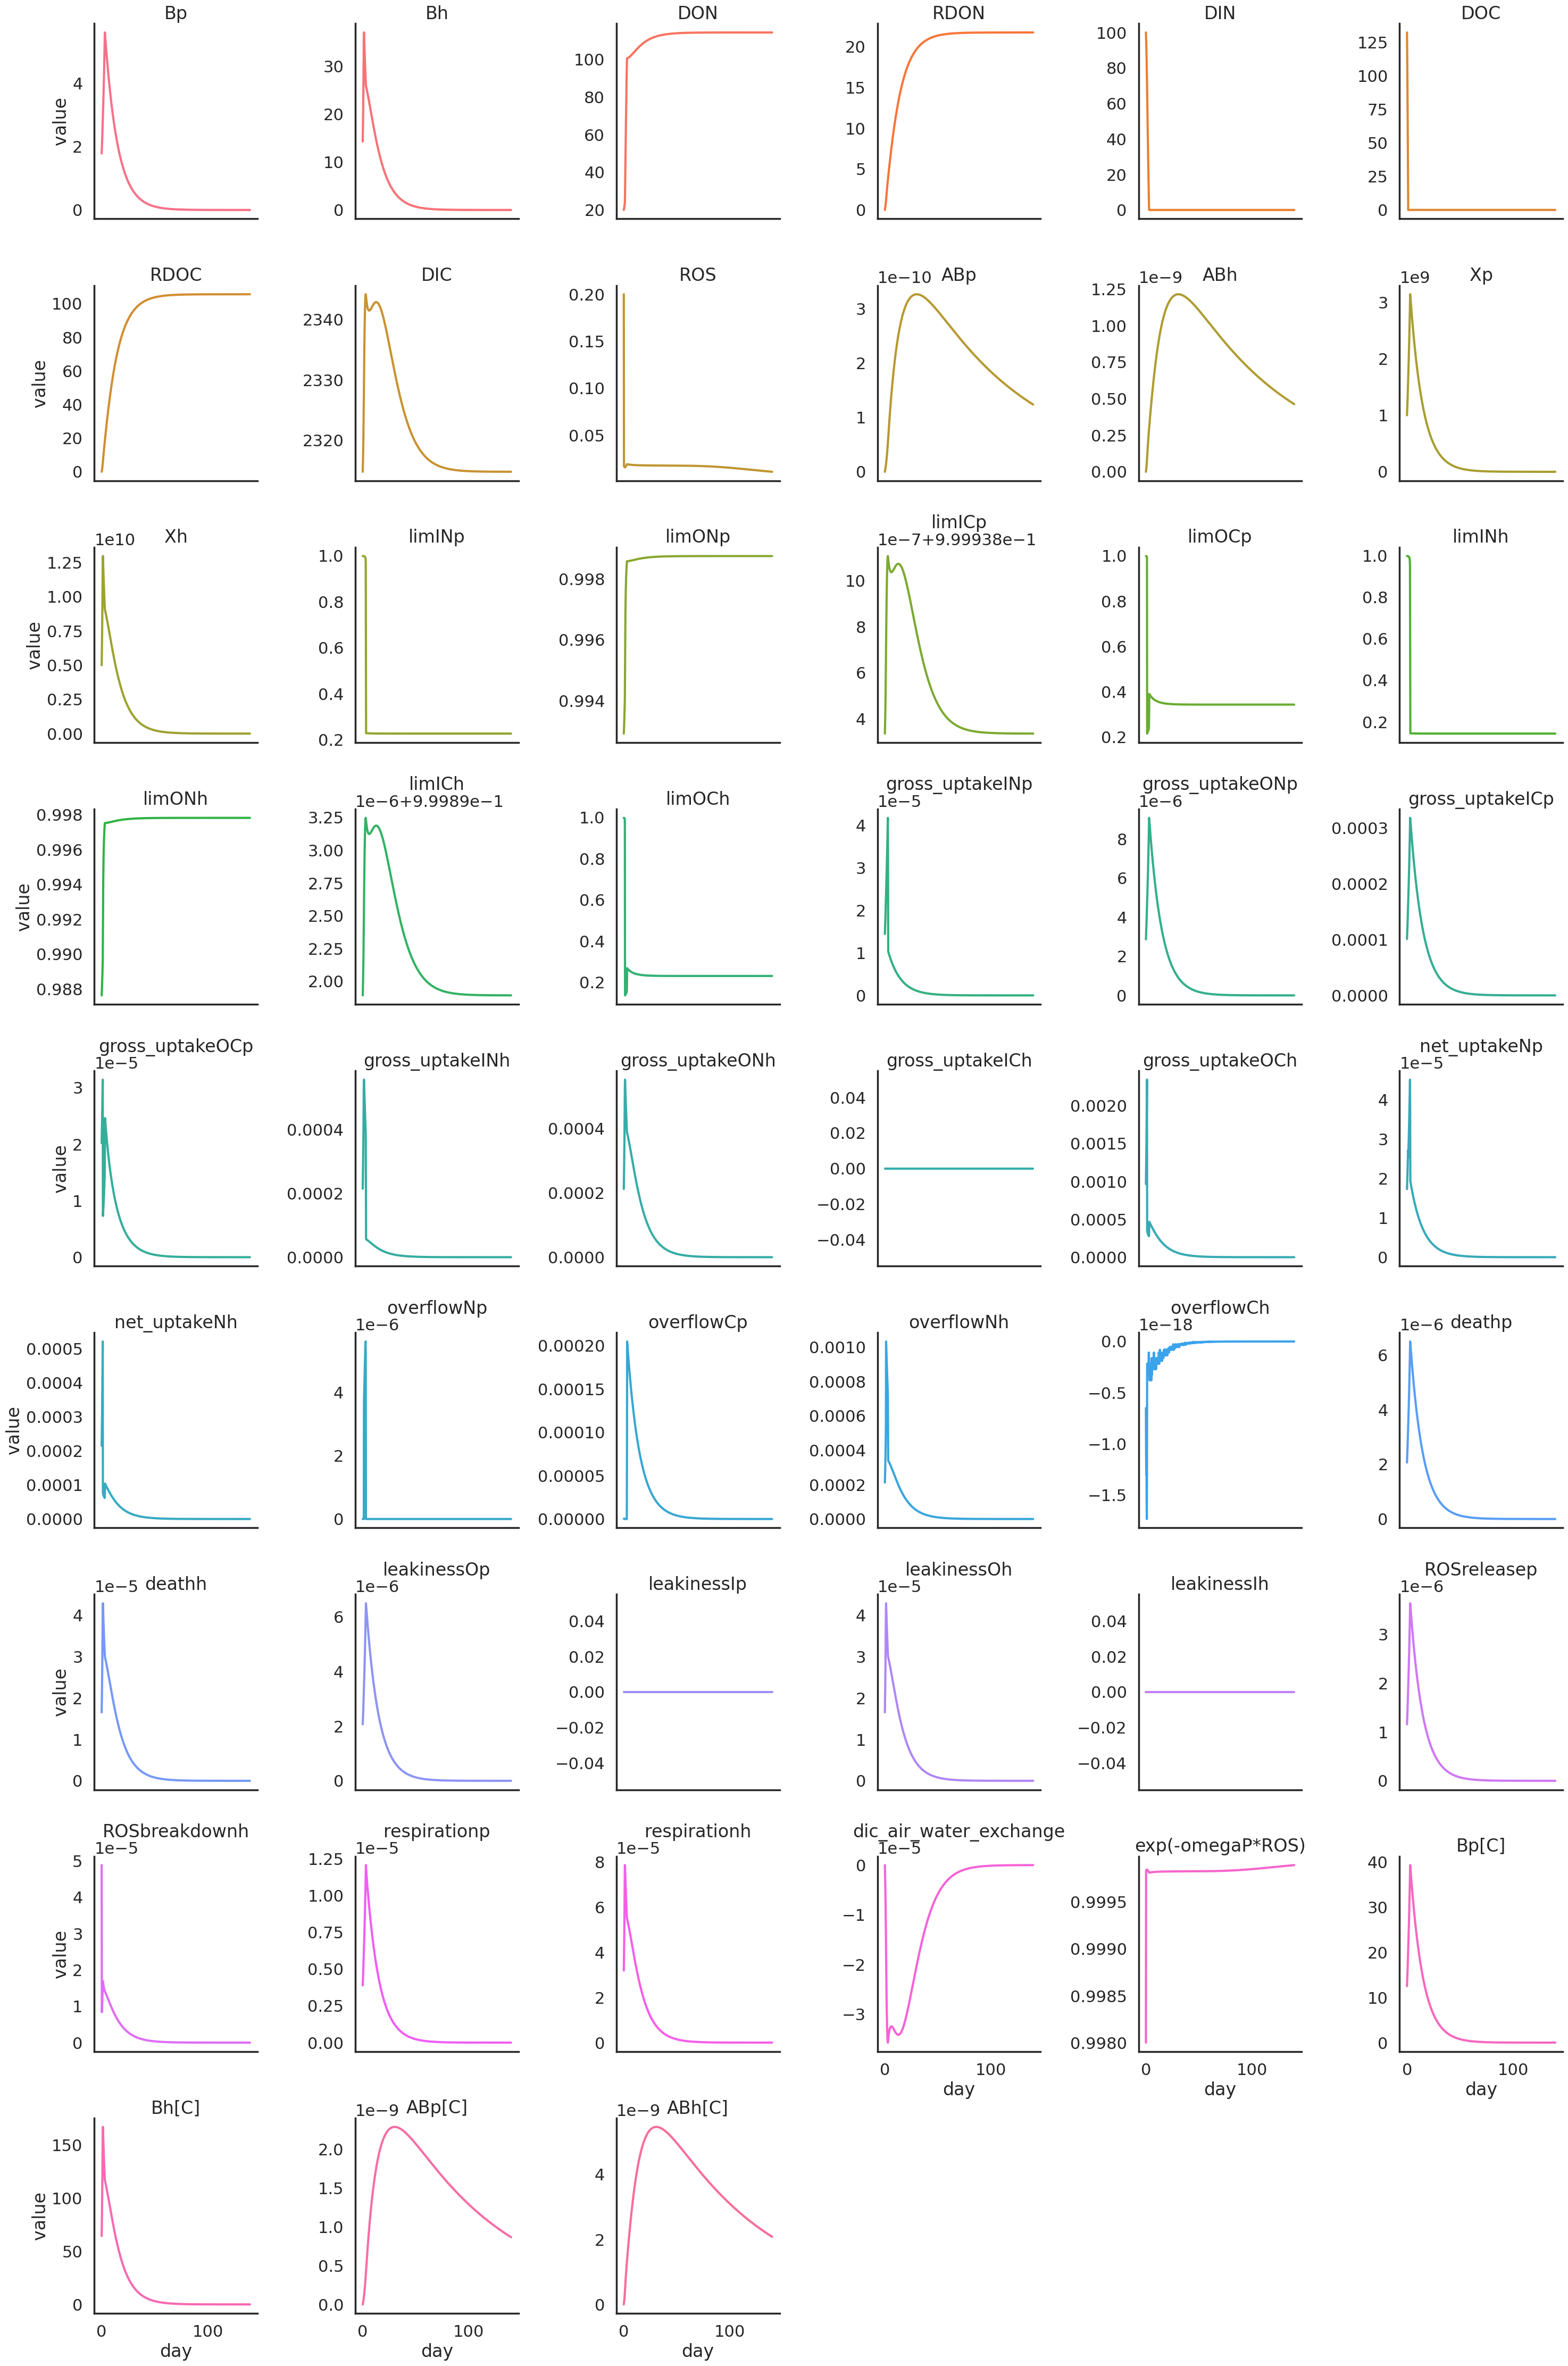

In [30]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [31]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<Axes: xlabel='day', ylabel='cells/l'>

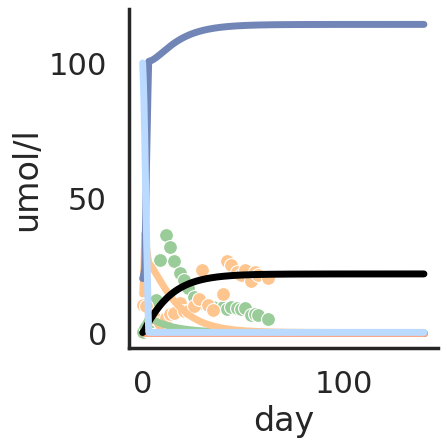

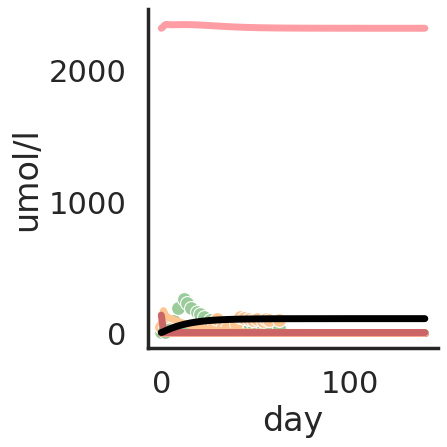

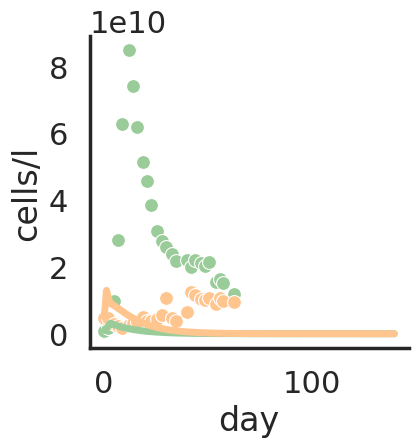

In [32]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


In [33]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp',
       'ABh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp',
       'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'net_uptakeNp', 'net_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'leakinessOp', 'leakinessIp', 'leakinessOh', 'leakinessIh',
       'ROSreleasep', 'ROSbreakdownh', 'respirationp', 'respirationh',
       'dic_air_water_exchange', 'exp(-omegaP*ROS)', 'Bp[C]', 'Bh[C]',
       'ABp[C]', 'ABh[C]'],
      dtype='object')

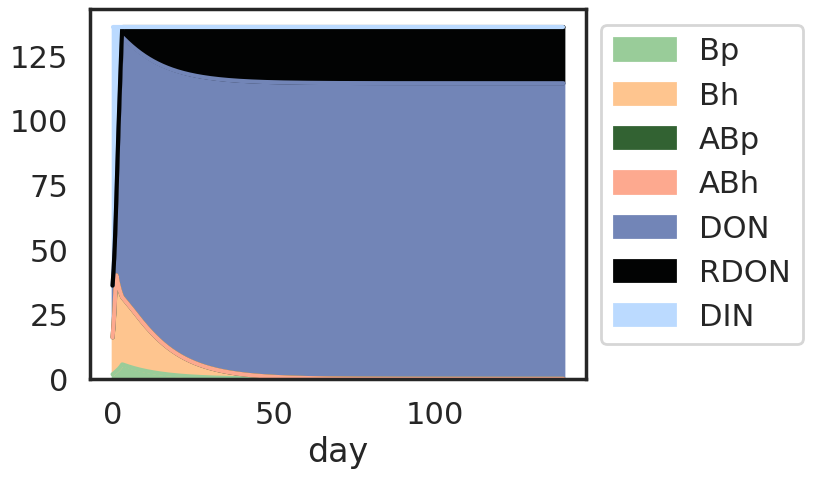

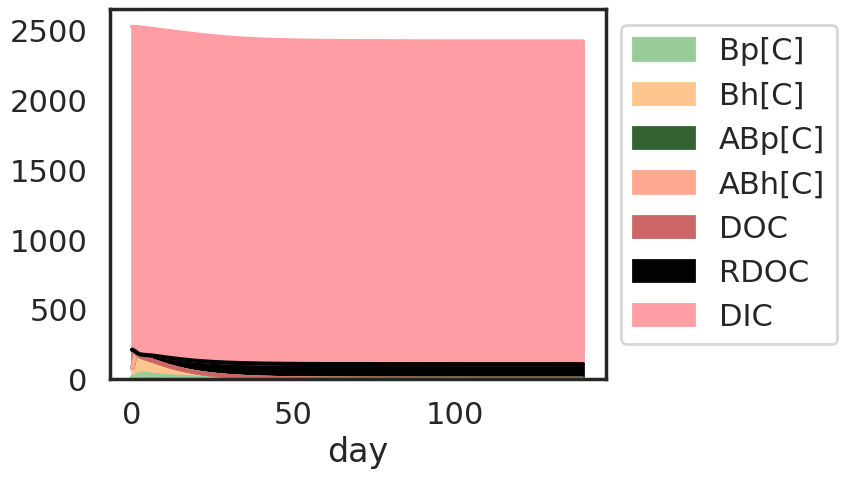

In [34]:
from matplotlib.colors import LinearSegmentedColormap
df[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


<Axes: xlabel='day', ylabel='cells/l'>

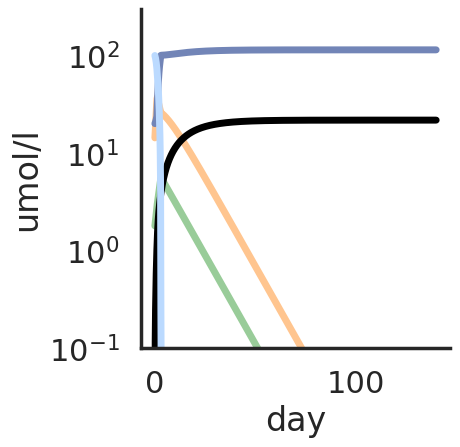

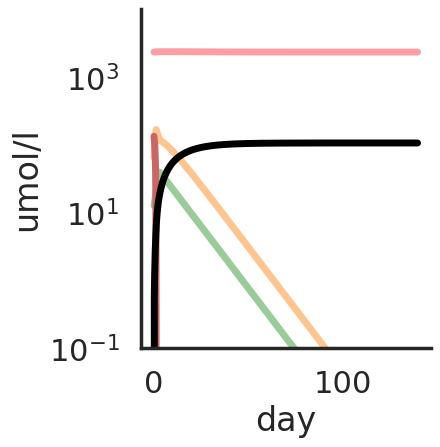

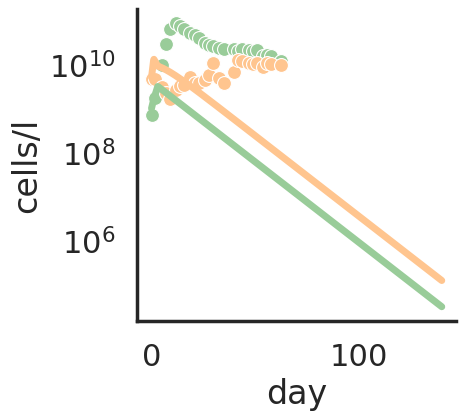

In [35]:
sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)

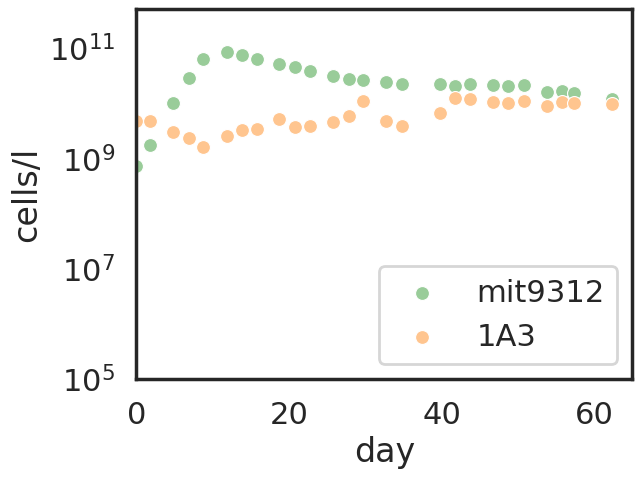

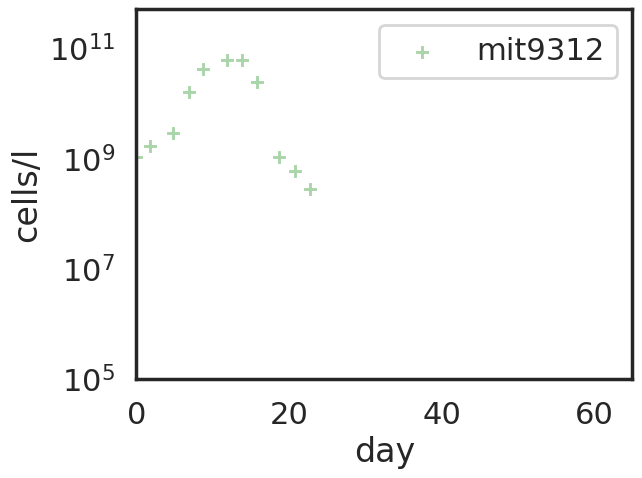

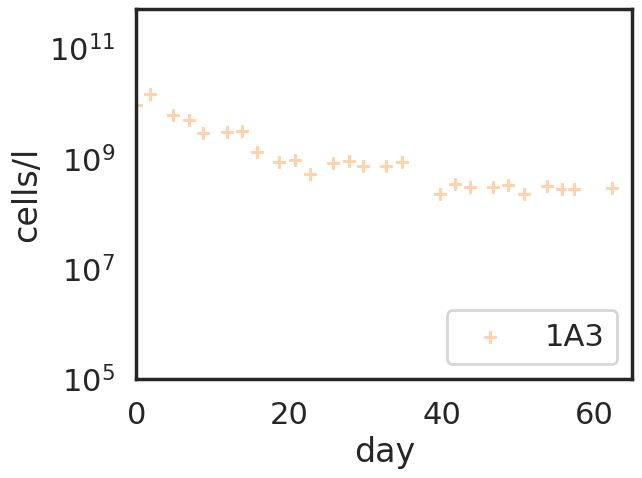

In [36]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))

plt.show()
sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
plt.legend()
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


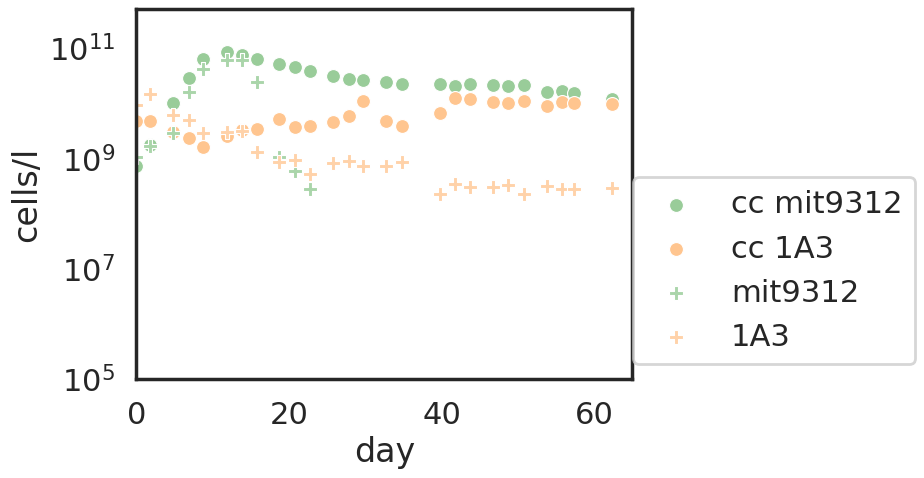

In [37]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='cc mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='cc 1A3')

sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right', bbox_to_anchor=(1.6,0))
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


In [38]:
len(param_vals)

In [39]:
df.min()

Bp                        5.715190e-05
Bh                        3.589839e-04
DON                       2.000000e+01
RDON                      0.000000e+00
DIN                       4.199489e-02
DOC                       3.925928e-02
RDOC                      0.000000e+00
DIC                       2.314799e+03
ROS                       1.100663e-02
ABp                       0.000000e+00
ABh                       0.000000e+00
t                         0.000000e+00
day                       0.000000e+00
Xp                        3.200506e+04
Xh                        1.256444e+05
limINp                    2.273119e-01
limONp                    9.929130e-01
limICp                    9.999383e-01
limOCp                    2.156984e-01
limINh                    1.436866e-01
limONh                    9.876410e-01
limICh                    9.998919e-01
limOCh                    1.355958e-01
gross_uptakeINp           1.052420e-10
gross_uptakeONp           9.248154e-11
gross_uptakeICp          

In [40]:
refdf.nsmallest(10, columns='cc mit9312')

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000e+00
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,1.573200e+05
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,4.175400e+05
25,25,26,62.351389,2.848207e+08,9.505116e+09,1.186807e+10,NaN,20.368106,0.610330,5.086318,NaN,91.656478,2.746485,35.604224,NaN,5.387160e+06
24,24,25,57.351389,2.790659e+08,9.908372e+09,1.519633e+10,NaN,21.232226,0.597998,6.512713,NaN,95.545017,2.690992,45.588989,NaN,4.955160e+06
22,22,23,53.763889,3.145955e+08,8.856279e+09,1.556821e+10,NaN,18.977741,0.674133,6.672091,NaN,85.399834,3.033599,46.704640,NaN,4.645200e+06
23,23,24,55.800694,2.812344e+08,1.053628e+10,1.622576e+10,NaN,22.577741,0.602645,6.953898,NaN,101.599834,2.711903,48.677285,NaN,4.821180e+06
17,17,18,41.790972,3.356130e+08,1.238930e+10,1.996330e+10,NaN,26.548505,0.719171,8.555698,NaN,119.468272,3.236268,59.889889,NaN,3.610740e+06
20,20,21,48.746528,3.338616e+08,1.001302e+10,2.034765e+10,NaN,21.456478,0.715418,8.720419,NaN,96.554153,3.219379,61.042936,NaN,4.211700e+06
19,19,20,46.776389,3.010842e+08,1.052512e+10,2.113608e+10,NaN,22.553821,0.645181,9.058320,NaN,101.492193,2.903312,63.408241,NaN,4.041480e+06


In [41]:
refdf.head()

,Unnamed: 0.1,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,10.069216,19.923240,0.307669,0.442556,45.311472,89.654581,2.153684,3.097889,0.000000
1,1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,9.960286,31.483118,0.751579,0.703318,44.821287,141.674030,5.261053,4.923225,157319.999971
2,2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,6.420061,12.921562,4.209925,1.222786,28.890276,58.147028,29.469474,8.559501,417540.000010
3,3,3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10,4.908658,10.686889,12.055038,6.754319,22.088959,48.091001,84.385263,47.280230,592139.999981
4,4,4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10,3.424487,6.144239,26.838496,17.628599,15.410189,27.649077,187.869474,123.400192,758520.000029


In [42]:
param_vals

{'Mh': 1.157407407407407e-06,
 'Mp': 1.157407407407407e-06,
 'gammaDp': 0.6,
 'gammaDh': 0.6,
 'Rp': 7.0,
 'Rh': 4.5,
 'EOp': 1.157407407407407e-06,
 'EIp': 0.0,
 'EOh': 1.157407407407407e-06,
 'EIh': 0.0,
 'KONp': 0.1427507995452611,
 'KINp': 0.1427507995452611,
 'KOCp': 0.1427507995452611,
 'KICp': 0.1427507995452611,
 'KONh': 0.2502723352076287,
 'KINh': 0.2502723352076287,
 'KOCh': 0.2502723352076287,
 'KICh': 0.2502723352076287,
 'VmaxONp': 1.6203703703703703e-06,
 'VmaxINp': 8.101851851851852e-06,
 'VmaxOCp': 1.1342592592592592e-05,
 'VmaxICp': 5.671296296296296e-05,
 'VmaxONh': 1.50462962962963e-05,
 'VmaxINh': 1.50462962962963e-05,
 'VmaxOCh': 6.770833333333334e-05,
 'VmaxICh': 0.0,
 'Oh': 1.0,
 'Op': 1.0,
 'E_ROSp': 6.481481481481481e-07,
 'E_ROSh': 4.050925925925926e-07,
 'VROSmax': 7.69675925925926e-06,
 'K_ROSh': 0.2502723352076287,
 'omegaP': 0.01,
 'omegaH': 1e-05,
 'ROS_decay': 1.1574074074074074e-07,
 'KABp': 0.1427507995452611,
 'KABh': 0.1427507995452611,
 'EABp': 6.4

In [43]:
param_vals_neutral

{'Mh': 1.1574074074074074e-06,
 'Mp': 1.1574074074074074e-06,
 'gammaDp': 0.8,
 'gammaDh': 0.8,
 'Rp': 7,
 'Rh': 4.5,
 'EOp': 5.787037037037037e-07,
 'EIp': 0.0,
 'EOh': 5.787037037037037e-07,
 'EIh': 0.0,
 'KONp': 0.14275079954526113,
 'KINp': 0.14275079954526113,
 'KOCp': 0.14275079954526113,
 'KICp': 0.14275079954526113,
 'KONh': 0.2502723352076287,
 'KINh': 0.2502723352076287,
 'KOCh': 0.2502723352076287,
 'KICh': 0.2502723352076287,
 'VmaxONp': 8.62037037037037e-06,
 'VmaxINp': 8.62037037037037e-06,
 'VmaxOCp': 6.034259259259259e-05,
 'VmaxICp': 6.034259259259259e-05,
 'VmaxONh': 1.539351851851852e-05,
 'VmaxINh': 1.539351851851852e-05,
 'VmaxOCh': 6.927083333333333e-05,
 'VmaxICh': 6.927083333333333e-09,
 'E_ROSp': 0,
 'E_ROSh': 0,
 'VROSmax': 7.69675925925926e-06,
 'K_ROSh': 0.2502723352076287,
 'omegaP': 0.01,
 'omegaH': 1e-05,
 'ROS_decay': 0.01,
 'KABp': 14.275079954526113,
 'KABh': 14.275079954526113,
 'EABp': 0,
 'EABh': 0,
 'MABp': 1.1574074074074074e-07,
 'MABh': 1.157407

In [44]:
param_df = pd.DataFrame( [param_vals, param_vals_neutral], index=['val', 'neutral']).T
param_df['diff'] = param_df['val'] - param_df['neutral'] 

In [45]:
param_df.loc[param_df['diff'] != 0.0]

,val,neutral,diff
Mh,1.157407e-06,1.157407e-06,-4.235165e-22
Mp,1.157407e-06,1.157407e-06,-4.235165e-22
gammaDp,6.000000e-01,8.000000e-01,-2.000000e-01
gammaDh,6.000000e-01,8.000000e-01,-2.000000e-01
EOp,1.157407e-06,5.787037e-07,5.787037e-07
EOh,1.157407e-06,5.787037e-07,5.787037e-07
KONp,1.427508e-01,1.427508e-01,-2.775558e-17
KINp,1.427508e-01,1.427508e-01,-2.775558e-17
KOCp,1.427508e-01,1.427508e-01,-2.775558e-17
KICp,1.427508e-01,1.427508e-01,-2.775558e-17


In [46]:
 0.7 * 1.9e-9 / Qp 

In [47]:
2 * 1.9e-9 / Qh 